We try to re-derive the formulas in the papers:  
  
(1) Perceptually informed synthesis of bandlimited classical waveforms using integrated polynomial interpolation  
  
(2) Rounding Corners with BLAMP
  

In [2]:
# define B-Spline functions:
B0 = piecewise([((-1/2,1/2),1)]) 
B1 = B0.convolution(B0)
B2 = B1.convolution(B0)
B3 = B2.convolution(B0)
#B0, B1, B2, B3
B3
#plot([B0,B1,B2,B3],xmin=-2,xmax=2)

piecewise(x|-->1/6*x^3 + x^2 + 2*x + 4/3 on (-2, -1], x|-->-1/2*x^3 - x^2 + 2/3 on (-1, 0], x|-->1/2*x^3 - x^2 + 2/3 on (0, 1], x|-->-1/6*x^3 + x^2 - 2*x + 4/3 on (1, 2]; x)

<code>
 1/6 * x^3 + x^2 + 2*x + 4/3 on (-2, -1]
-1/2 * x^3 - x^2       + 2/3 on (-1,  0]
 1/2 * x^3 - x^2       + 2/3 on ( 0,  1]
-1/6 * x^3 + x^2 - 2*x + 4/3 on ( 1,  2]    
</code>
...hmm...looking at the formulas in the papers ((1), TableVII, (2), Table 1) it seems, what sage calls x corresponds to -D there. ...or no - that also doesn't work - i think their "D" must mean something else - in (1) under Eq 14, it says:

"D is a real number that corresponds to the delay from the beginning (n=0) of the impulse response"

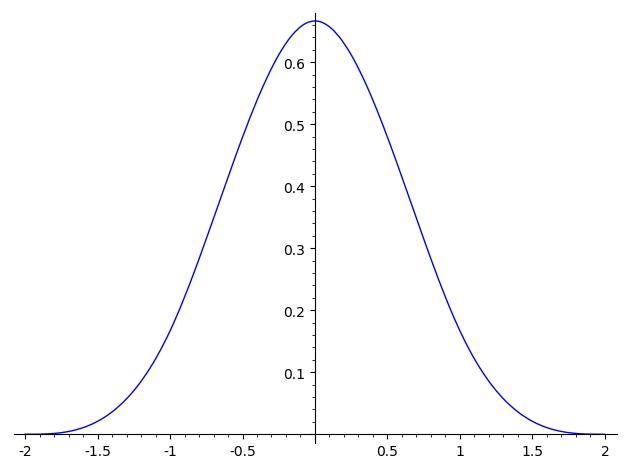

In [3]:
# let's plot the 3rd order B-Spline - that's the one we want to use:
plot(B3, -2, 2)

In [4]:
# ok - that plot resembles (2) Fig. 3a, as it should
# ..now integrate B3:
blep = B3.integral()
blep

piecewise(x|-->1/24*x^4 + 1/3*x^3 + x^2 + 4/3*x + 2/3 on (-2, -1], x|-->-1/8*x^4 - 1/3*x^3 + 2/3*x + 1/2 on (-1, 0], x|-->1/8*x^4 - 1/3*x^3 + 2/3*x + 1/2 on (0, 1], x|-->-1/24*x^4 + 1/3*x^3 - x^2 + 4/3*x + 1/3 on (1, 2]; x)

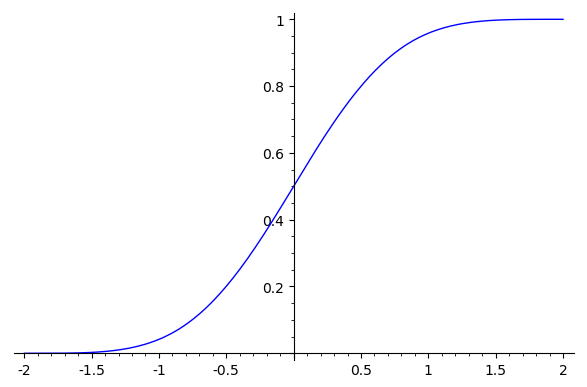

In [5]:
#....and plot the obtained function:
plot(blep, -2, 2)

In [6]:
# yes, that looks like Fig 3b - now for the blamp and Fig 3c:
blamp = blep.integral()
blamp

piecewise(x|-->1/120*x^5 + 1/12*x^4 + 1/3*x^3 + 2/3*x^2 + 2/3*x + 4/15 on (-2, -1], x|-->-1/40*x^5 - 1/12*x^4 + 1/3*x^2 + 1/2*x + 7/30 on (-1, 0], x|-->1/40*x^5 - 1/12*x^4 + 1/3*x^2 + 1/2*x + 7/30 on (0, 1], x|-->-1/120*x^5 + 1/12*x^4 - 1/3*x^3 + 2/3*x^2 + 1/3*x + 4/15 on (1, 2]; x)

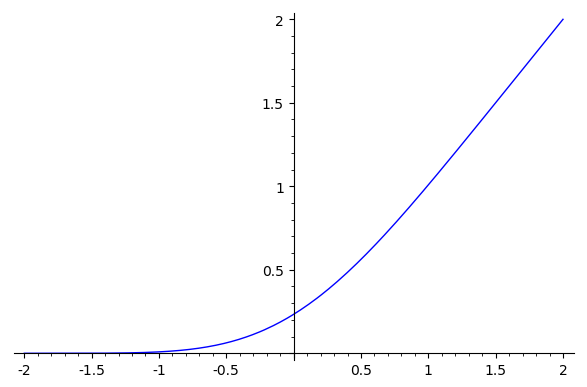

In [7]:
plot(blamp, -2, 2)

In [8]:
# ...the plots look good but the coeffs are wrong.. ok, anyway - now for 
# the blamp residual and fig 3d:
ramp = piecewise([((-oo,0),0), ((0,oo),x)])
res  = blamp - ramp
res

piecewise(x|-->1/120*x^5 + 1/12*x^4 + 1/3*x^3 + 2/3*x^2 + 2/3*x + 4/15 on (-2, -1], x|-->-1/40*x^5 - 1/12*x^4 + 1/3*x^2 + 1/2*x + 7/30 on (-1, 0], x|-->1/40*x^5 - 1/12*x^4 + 1/3*x^2 + 1/2*x + 7/30 on (0, 1], x|-->-1/120*x^5 + 1/12*x^4 - 1/3*x^3 + 2/3*x^2 + 1/3*x + 4/15 on (1, 2]; x) - piecewise(x|-->0 on (-oo, 0), x|-->x on (0, +oo); x)

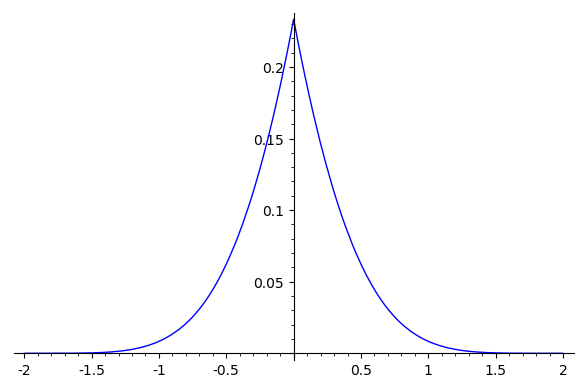

In [10]:
# ...careful: sage does not adapt the polynomial coeffs of the 
# blamp (turning the +x/2 into -x/2 in the 3rd and 4th section)
# but rather writes it as difference of two piecewise functions!
# ...anyway - let's plot it:
plot(res, -2, 2)

In [11]:
blamp(2)

2